In [85]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
def column_stats(df, column_name, n=None):
    if n is None:
        n = df.shape[0]
    count_column_name = column_name + "_count"
    count_df = pd.DataFrame(df[column_name].value_counts()).reset_index()
    count_df.columns=[column_name, count_column_name]
    count_df[column_name + "_percent"] = count_df[count_column_name].apply(lambda x: int(x)/n*100)
    print(f"Number of unique values = {len(df[column_name].unique())}")
    print(f"{count_df}")
    return count_df
    
def filter_with_threshold_percentage(df, column_name, threshold, n=None):
    print(f"Size of df = {df.shape}")
    if n is None:
        n = df.shape[0]
    print(f"n= {n}")
    count_df = column_stats(df, column_name, n=n)
    percent_column_name = column_name + "_percent"
    filtered_count_df = count_df[count_df[percent_column_name] >= threshold]
    print("COUNT DF")
    print(count_df)
    filtered_df = df[df[column_name].isin(list(filtered_count_df[column_name].values))]
    print(f"Size of filtered df = {filtered_df.shape}")
    column_stats(filtered_df, column_name, n=n)
    return filtered_df

In [87]:
def filter_with_threshold_count(df, column_name, threshold, n=None):
    print(f"Size of df = {df.shape}")
    n = df.shape[0]
    count_df = column_stats(df, column_name, n=n)
    count_column_name = column_name + "_count"
    filtered_count_df = count_df[count_df[count_column_name] >= threshold]
    filtered_df = df[df[column_name].isin(list(filtered_count_df[column_name].values))]
    print(f"Size of filtered df = {filtered_df.shape}")
    column_stats(filtered_df, column_name, n=n)
    return filtered_df

In [88]:
def print_seq_len_histogram(df, n_bins):
    sns.histplot(df["seq_len"])
    print(f"min seq len = {min(df['seq_len'])}")
    print(f"max seq len = {max(df['seq_len'])}")
    plt.show()
    
    freq, bins = np.histogram(df["seq_len"], bins=n_bins)
    n = df.shape[0]
    hist_map = []
    for i in range(n_bins):
        hist_map.append({"start": bins[i], "end":bins[i+1], "count": freq[i], "percentage": freq[i]/n*100})
    hist_df = pd.DataFrame(hist_map)
    print(hist_df)

In [89]:
HOME = "/home/sipek/zoonosis"

# UniRef90 - EMBL mapping Dataset Generation


### input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata.csv

In [90]:
file_path = os.path.join(HOME, "input/data/uniprotkb/031925/preprocessing/uniprotkb_hepeviridae_0.9_uniprot_metadata_embl_hosts_pruned_metadata.csv")
df = pd.read_csv(file_path)
df.head()

,uniprot_id,tax_id,uniprot_host_tax_ids,embl_ref_id,embl_host_name,virus_host_name,virus_name,virus_taxon_rank,virus_host_tax_id,virus_host_taxon_rank
0,A0A7G1HKI9,1678143,"[69079, 9481, 9536, 9534, 9031, 9606, 9539, 10...",BCG49788.1,['Rattus norvegicus'],rattus norvegicus,Paslahepevirus balayani,species,10116,species
1,C5IJZ4,1678143,"[69079, 9481, 9536, 9534, 9031, 9606, 9539, 10...",ACR46848.1,['Homo sapiens'],homo sapiens,Paslahepevirus balayani,species,9606,species
2,A0A076U639,1678143,"[69079, 9481, 9536, 9534, 9031, 9606, 9539, 10...",AIK01941.1,['Homo sapiens'],homo sapiens,Paslahepevirus balayani,species,9606,species
3,A0A7G1HKI5,1678143,"[69079, 9481, 9536, 9534, 9031, 9606, 9539, 10...",BCG49789.1,['Rattus norvegicus'],rattus norvegicus,Paslahepevirus balayani,species,10116,species
4,C7EW55,1678143,"[69079, 9481, 9536, 9534, 9031, 9606, 9539, 10...",ACT67412.1,['Homo sapiens'],homo sapiens,Paslahepevirus balayani,species,9606,species


In [91]:
column_stats(df[df["virus_taxon_rank"] == "species"], "virus_name")

Number of unique values = 46
                                        virus_name  virus_name_count  \
0                          Paslahepevirus balayani               199   
1                              Rocahepevirus ratti                13   
2                                    Hepevirus sp.                 5   
3                          Avihepevirus magniiecur                 5   
4                                Sanya hepevirus 1                 3   
5              Sogatella furcifera hepe-like virus                 3   
6                             Hangzhou hepevirus 1                 3   
7                      Crustacea hepe-like virus 1                 3   
8                                 Galago hepevirus                 3   
9                          French Guiana hepevirus                 3   
10          Wenling thamnaconus striatus hepevirus                 3   
11         Murine feces-associated hepe-like virus                 3   
12                                S

,virus_name,virus_name_count,virus_name_percent
0,Paslahepevirus balayani,199,67.687075
1,Rocahepevirus ratti,13,4.421769
2,Hepevirus sp.,5,1.700680
3,Avihepevirus magniiecur,5,1.700680
4,Sanya hepevirus 1,3,1.020408
5,Sogatella furcifera hepe-like virus,3,1.020408
6,Hangzhou hepevirus 1,3,1.020408
7,Crustacea hepe-like virus 1,3,1.020408
8,Galago hepevirus,3,1.020408
9,French Guiana hepevirus,3,1.020408


In [92]:
column_stats(df[df["virus_taxon_rank"] == "species"], "virus_host_name")

Number of unique values = 72
                  virus_host_name  virus_host_name_count  \
0                    homo sapiens                    122   
1               rattus norvegicus                     14   
2                           swine                      9   
3                       wild boar                      9   
4            halichondria panicea                      7   
..                            ...                    ...   
67                   rattus losea                      1   
68                   tibetan pigs                      1   
69    thamnaconus septentrionalis                      1   
70                     wild boars                      1   
71  altolamprologus compressiceps                      1   

    virus_host_name_percent  
0                 41.496599  
1                  4.761905  
2                  3.061224  
3                  3.061224  
4                  2.380952  
..                      ...  
67                 0.340136  
68        

,virus_host_name,virus_host_name_count,virus_host_name_percent
0,homo sapiens,122,41.496599
1,rattus norvegicus,14,4.761905
2,swine,9,3.061224
3,wild boar,9,3.061224
4,halichondria panicea,7,2.380952
...,...,...,...
67,rattus losea,1,0.340136
68,tibetan pigs,1,0.340136
69,thamnaconus septentrionalis,1,0.340136
70,wild boars,1,0.340136


### uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq.csv

In [93]:
file_path = os.path.join(HOME, "input/data/uniprotkb/031925/preprocessing/uniprotkb_hepeviridae_0.9_uniprot_metadata_embl_hosts_pruned_metadata_species_virus_species_virus_host_vertebrates_w_seq.csv")

In [94]:
df = pd.read_csv(file_path)
df["seq_len"] = df["seq"].apply(lambda x: len(x))

### Deduplicate: Remove duplicates, retain the first occurence
#### TODO: Investigate the presence of 5 duplicate records

In [95]:
df = df[~df.duplicated()]

In [96]:
print("df size = ", df.shape)
df.head()

df size =  (234, 12)


,uniprot_id,tax_id,uniprot_host_tax_ids,embl_ref_id,embl_host_name,virus_host_name,virus_name,virus_taxon_rank,virus_host_tax_id,virus_host_taxon_rank,seq,seq_len
0,A0A7G1HKI9,1678143,"[69079, 9481, 9536, 9534, 9031, 9606, 9539, 10...",BCG49788.1,['Rattus norvegicus'],rattus norvegicus,Paslahepevirus balayani,species,10116,species,MCAKCLSLSCSCFCCSCRCCLRPQCTPEDLGAQVGRGGGHVQMQPC...,103
1,C5IJZ4,1678143,"[69079, 9481, 9536, 9534, 9031, 9606, 9539, 10...",ACR46848.1,['Homo sapiens'],homo sapiens,Paslahepevirus balayani,species,9606,species,IEKEILALLPPNIFYGDAYEESVFAAAVAGAGSCMVFENDFSEFDS...,55
2,A0A076U639,1678143,"[69079, 9481, 9536, 9534, 9031, 9606, 9539, 10...",AIK01941.1,['Homo sapiens'],homo sapiens,Paslahepevirus balayani,species,9606,species,SGFSSDFSPPEAAHAALVPDVGLPSGTPSSAGDVWVFPPPSEGSTI...,82
3,A0A7G1HKI5,1678143,"[69079, 9481, 9536, 9534, 9031, 9606, 9539, 10...",BCG49789.1,['Rattus norvegicus'],rattus norvegicus,Paslahepevirus balayani,species,10116,species,MLVVVVLVLLLFVPLLPAAPMYPGGSRGAGGPRRGTRADAALSHPA...,645
4,C7EW55,1678143,"[69079, 9481, 9536, 9534, 9031, 9606, 9539, 10...",ACT67412.1,['Homo sapiens'],homo sapiens,Paslahepevirus balayani,species,9606,species,ANGEATVKFYTSVENAQQNKGTASPHDIDLGESRVVIQDYDNQ,43


In [97]:
column_stats(df, "virus_name").to_csv(os.path.join("/home/sipek/zoonosis", "input/data/uniprotkb/031925/metadata/uniprotkb_hepeviridae_embl_hosts_pruned_species_vertebrates_virus.csv"))

Number of unique values = 33
                                       virus_name  virus_name_count  \
0                         Paslahepevirus balayani               175   
1                             Rocahepevirus ratti                12   
2                                Galago hepevirus                 3   
3          Wenling thamnaconus striatus hepevirus                 3   
4         Murine feces-associated hepe-like virus                 3   
5                                Spalax hepevirus                 3   
6             Guangdong fish caecilians hepevirus                 2   
7                         Avihepevirus magniiecur                 2   
8             Avian associated hepe-like virus 10                 2   
9                 Calomys tener Hepatitis E virus                 2   
10         Wenling samurai squirrelfish hepevirus                 2   
11                                 Newt hepevirus                 2   
12               Dongbei arctic lamprey hepeviru

In [98]:
column_stats(df, "virus_host_name").to_csv(os.path.join(HOME, "input/data/uniprotkb/031925/metadata/uniprotkb_hepeviridae_embl_hosts_pruned_species_vertebrates_virus_host.csv"))

Number of unique values = 46
                  virus_host_name  virus_host_name_count  \
0                    homo sapiens                    122   
1               rattus norvegicus                     14   
2                           swine                      9   
3                       wild boar                      9   
4              apodemus chevrieri                      7   
5               petroica longipes                      5   
6                             pig                      4   
7         eothenomys melanogaster                      3   
8                    mus musculus                      3   
9              nannospalax galili                      3   
10            galago senegalensis                      3   
11           thamnaconus striatus                      3   
12                         rabbit                      3   
13         ichthyophis bannanicus                      2   
14           sargocentron ittodai                      2   
15         

min seq len = 20
max seq len = 2457


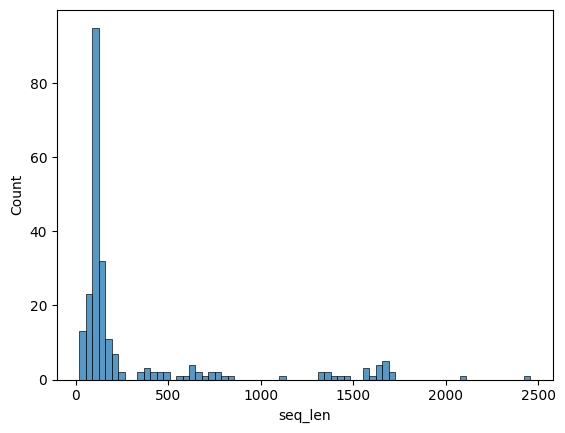

          start          end  count  percentage
0     20.000000   223.083333    178   76.068376
1    223.083333   426.166667     12    5.128205
2    426.166667   629.250000      8    3.418803
3    629.250000   832.333333     10    4.273504
4    832.333333  1035.416667      1    0.427350
5   1035.416667  1238.500000      1    0.427350
6   1238.500000  1441.583333      6    2.564103
7   1441.583333  1644.666667      8    3.418803
8   1644.666667  1847.750000      8    3.418803
9   1847.750000  2050.833333      0    0.000000
10  2050.833333  2253.916667      1    0.427350
11  2253.916667  2457.000000      1    0.427350


In [99]:
print_seq_len_histogram(df, 12)

## Non - Immunodeficiency Virus

In [100]:
virus_names = list(df["virus_name"].unique())
print(f"Number of unique viruses = {len(virus_names)}")
virus_names

Number of unique viruses = 33


['Paslahepevirus balayani',
 'Galago hepevirus',
 'Spalax hepevirus',
 'Newt hepevirus',
 'Hepelivirus',
 'Rocahepevirus ratti',
 'Wenzhou Pipistrellus abramus orthohepevirus 1',
 'Longquan Rhinolophus sinicus orthohepevirus 1',
 'Hepevirus fur seal/AAUST73/BR/2012',
 'Hepevirus Mystacina/New Zealand/2013/3',
 'Calomys tener Hepatitis E virus',
 'Necromys lasiurus Hepatitis E virus',
 'Wenling thamnaconus striatus hepevirus',
 'Dongbei arctic lamprey hepevirus',
 'Guangdong fish caecilians hepevirus',
 'Nanhai ghost shark hepevirus',
 'Murine feces-associated hepe-like virus',
 'Rana hepevirus',
 'Wenling samurai squirrelfish hepevirus',
 'Wenling thamnaconus septentrionalis hepevirus',
 'Avihepevirus magniiecur',
 'Wenling moray eel hepevirus',
 'Rhinella marina hepe-like virus',
 'Herring hepe-like virus',
 'Swiper virus',
 'Rodent hepevirus',
 'Avian associated hepe-like virus 10',
 'Avian associated hepe-like virus 9',
 'Avian associated hepe-like virus 7',
 'Avian associated hepe-

In [101]:
idv_names = list(filter(lambda x: "immunodeficiency" in x.lower(), virus_names))

In [102]:
idv_names

[]

In [103]:
non_idv_df = df[~df["virus_name"].isin(idv_names)]
non_idv_df.shape

(234, 12)

In [104]:
output_file_path = os.path.join(HOME, "input/data/uniprotkb/031925/uniprotkb_hepeviridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv.csv")
non_idv_df.to_csv(output_file_path, index=False)

In [105]:
non_idv_df = pd.read_csv(output_file_path)
non_idv_df.shape

(234, 12)

In [106]:
column_stats(non_idv_df, "virus_name").to_csv(os.path.join(HOME, "input/data/uniprotkb/031925/metadata/uniprotkb_hepeviridae_embl_hosts_pruned_species_vertebrates_nonidv_virus.csv"))

Number of unique values = 33
                                       virus_name  virus_name_count  \
0                         Paslahepevirus balayani               175   
1                             Rocahepevirus ratti                12   
2                                Galago hepevirus                 3   
3          Wenling thamnaconus striatus hepevirus                 3   
4         Murine feces-associated hepe-like virus                 3   
5                                Spalax hepevirus                 3   
6             Guangdong fish caecilians hepevirus                 2   
7                         Avihepevirus magniiecur                 2   
8             Avian associated hepe-like virus 10                 2   
9                 Calomys tener Hepatitis E virus                 2   
10         Wenling samurai squirrelfish hepevirus                 2   
11                                 Newt hepevirus                 2   
12               Dongbei arctic lamprey hepeviru

In [107]:
column_stats(non_idv_df, "virus_host_name").to_csv(os.path.join(HOME, "input/data/uniprotkb/031925/metadata/uniprotkb_hepeviridae_embl_hosts_pruned_species_vertebrates_nonidv_virus_host.csv"))

Number of unique values = 46
                  virus_host_name  virus_host_name_count  \
0                    homo sapiens                    122   
1               rattus norvegicus                     14   
2                           swine                      9   
3                       wild boar                      9   
4              apodemus chevrieri                      7   
5               petroica longipes                      5   
6                             pig                      4   
7         eothenomys melanogaster                      3   
8                    mus musculus                      3   
9              nannospalax galili                      3   
10            galago senegalensis                      3   
11           thamnaconus striatus                      3   
12                         rabbit                      3   
13         ichthyophis bannanicus                      2   
14           sargocentron ittodai                      2   
15         

min seq len = 20
max seq len = 2457


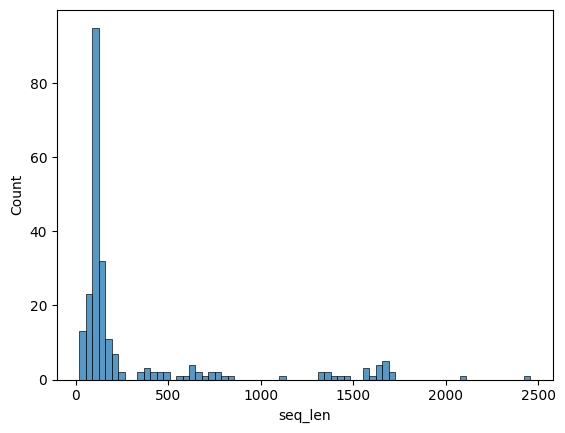

          start          end  count  percentage
0     20.000000   223.083333    178   76.068376
1    223.083333   426.166667     12    5.128205
2    426.166667   629.250000      8    3.418803
3    629.250000   832.333333     10    4.273504
4    832.333333  1035.416667      1    0.427350
5   1035.416667  1238.500000      1    0.427350
6   1238.500000  1441.583333      6    2.564103
7   1441.583333  1644.666667      8    3.418803
8   1644.666667  1847.750000      8    3.418803
9   1847.750000  2050.833333      0    0.000000
10  2050.833333  2253.916667      1    0.427350
11  2253.916667  2457.000000      1    0.427350


In [108]:
print_seq_len_histogram(non_idv_df, 12)

**Number of host classes**

In [110]:
# 1% cutoff
filtered_df = filter_with_threshold_percentage(non_idv_df, "virus_host_name", 1)
filtered_df = filter_with_threshold_count(filtered_df, "virus_host_name", 6)

Size of df = (234, 12)
n= 234
Number of unique values = 46
                  virus_host_name  virus_host_name_count  \
0                    homo sapiens                    122   
1               rattus norvegicus                     14   
2                           swine                      9   
3                       wild boar                      9   
4              apodemus chevrieri                      7   
5               petroica longipes                      5   
6                             pig                      4   
7         eothenomys melanogaster                      3   
8                    mus musculus                      3   
9              nannospalax galili                      3   
10            galago senegalensis                      3   
11           thamnaconus striatus                      3   
12                         rabbit                      3   
13         ichthyophis bannanicus                      2   
14           sargocentron ittodai        

min seq len = 22
max seq len = 1691


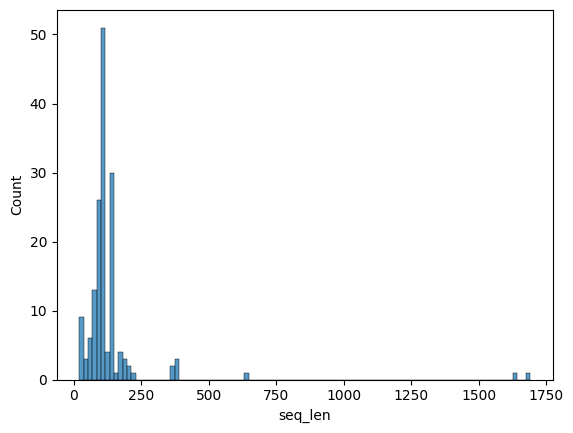

          start          end  count  percentage
0     22.000000   161.083333    143   88.819876
1    161.083333   300.166667     10    6.211180
2    300.166667   439.250000      5    3.105590
3    439.250000   578.333333      0    0.000000
4    578.333333   717.416667      1    0.621118
5    717.416667   856.500000      0    0.000000
6    856.500000   995.583333      0    0.000000
7    995.583333  1134.666667      0    0.000000
8   1134.666667  1273.750000      0    0.000000
9   1273.750000  1412.833333      0    0.000000
10  1412.833333  1551.916667      0    0.000000
11  1551.916667  1691.000000      2    1.242236


In [111]:
print_seq_len_histogram(filtered_df, 12)

In [112]:
output_file_path = os.path.join(HOME, "input/data/uniprotkb/031925/uniprotkb_hepeviridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv_t0.01_c5.csv")
# filtered_df.to_csv(output_file_path, index=False)

**Sequence Length Parameters**

In [113]:
np.percentile(filtered_df["seq_len"].values, [90, 95, 99.9])

array([ 172.  ,  220.  , 1682.52])

min seq len = 22
max seq len = 1691


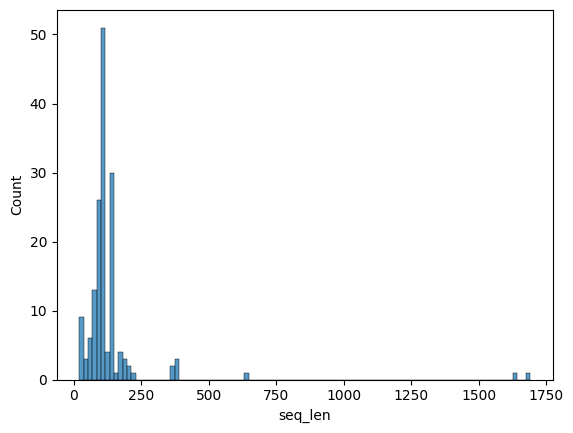

          start          end  count  percentage
0     22.000000   161.083333    143   88.819876
1    161.083333   300.166667     10    6.211180
2    300.166667   439.250000      5    3.105590
3    439.250000   578.333333      0    0.000000
4    578.333333   717.416667      1    0.621118
5    717.416667   856.500000      0    0.000000
6    856.500000   995.583333      0    0.000000
7    995.583333  1134.666667      0    0.000000
8   1134.666667  1273.750000      0    0.000000
9   1273.750000  1412.833333      0    0.000000
10  1412.833333  1551.916667      0    0.000000
11  1551.916667  1691.000000      2    1.242236


In [114]:
print_seq_len_histogram(filtered_df, 12)

In [115]:
seq_len_filtered_df = filtered_df[filtered_df["seq_len"] <= 3036]
seq_len_filtered_df.shape

(161, 12)

In [116]:
column_stats(seq_len_filtered_df, "virus_host_name")

Number of unique values = 5
      virus_host_name  virus_host_name_count  virus_host_name_percent
0        homo sapiens                    122                75.776398
1   rattus norvegicus                     14                 8.695652
2               swine                      9                 5.590062
3           wild boar                      9                 5.590062
4  apodemus chevrieri                      7                 4.347826


,virus_host_name,virus_host_name_count,virus_host_name_percent
0,homo sapiens,122,75.776398
1,rattus norvegicus,14,8.695652
2,swine,9,5.590062
3,wild boar,9,5.590062
4,apodemus chevrieri,7,4.347826


In [39]:
# column_stats(seq_len_filtered_df, "virus_name")

In [30]:
output_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv_t0.01_c5_seq_len_in_99.9percentile.csv")
# seq_len_filtered_df.to_csv(output_file_path, index=False)

### Non Immunodeficiency Virus, hosts with < 1% prevalence in the dataset

In [117]:
hosts_with_one_percent_prevalence = seq_len_filtered_df["virus_host_name"].unique().tolist()
hosts_with_one_percent_prevalence

['rattus norvegicus',
 'homo sapiens',
 'swine',
 'apodemus chevrieri',
 'wild boar']

In [118]:
non_idv_less_than_one_percent_prevalence_df = non_idv_df[~non_idv_df["virus_host_name"].isin(hosts_with_one_percent_prevalence)]
non_idv_less_than_one_percent_prevalence_df.shape

(73, 12)

In [21]:
non_idv_less_than_one_percent_prevalence_df = pd.read_csv(os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv_lt_1percent_prevalence.csv"))
non_idv_less_than_one_percent_prevalence_df.shape

(16074, 12)

In [22]:
np.percentile(non_idv_less_than_one_percent_prevalence_df["seq_len"].values, [90, 95, 99])

array([ 840.7 , 1446.  , 3025.27])

min seq len = 11
max seq len = 8249


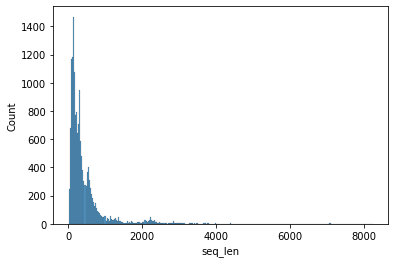

     start     end  count  percentage
0     11.0   697.5  13885   86.381734
1    697.5  1384.0   1340    8.336444
2   1384.0  2070.5    269    1.673510
3   2070.5  2757.0    339    2.108996
4   2757.0  3443.5    127    0.790096
5   3443.5  4130.0     51    0.317283
6   4130.0  4816.5     11    0.068433
7   4816.5  5503.0      6    0.037327
8   5503.0  6189.5      6    0.037327
9   6189.5  6876.0     15    0.093318
10  6876.0  7562.5     18    0.111982
11  7562.5  8249.0      7    0.043549


In [23]:
print_seq_len_histogram(non_idv_less_than_one_percent_prevalence_df, 12)

In [24]:
non_idv_less_than_one_percent_prevalence_seq_len_filtered_df = non_idv_less_than_one_percent_prevalence_df[non_idv_less_than_one_percent_prevalence_df["seq_len"] <= 3025]
non_idv_less_than_one_percent_prevalence_seq_len_filtered_df.shape

(15913, 12)

In [43]:
output_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv_lt_1percent_prevalence_seq_len_in_99percentile.csv")
# non_idv_less_than_one_percent_prevalence_seq_len_filtered_df.to_csv(output_file_path)

#### Non-IDV with host prevalence < 1%, >=0.05%

In [6]:
filtered_df = filter_with_threshold_percentage(non_idv_less_than_one_percent_prevalence_df, "virus_host_name", 0.05, n=47792)

Size of df = (16074, 12)
n= 47792
Number of unique values = 1299
                                        virus_host_name  virus_host_name_count  virus_host_name_percent
0                                       Cyprinus carpio                    411                 0.859977
1                                    Petroica australis                    408                 0.853699
2                                           Felis catus                    298                 0.623535
3                                     Gopherus morafkai                    292                 0.610981
4                                     Peromyscus boylii                    282                 0.590057
5                                  Marmota flaviventris                    271                 0.567041
6                                            Bos taurus                    257                 0.537747
7                                      Eptesicus fuscus                    255                 0.533562

min seq len = 11
max seq len = 8108


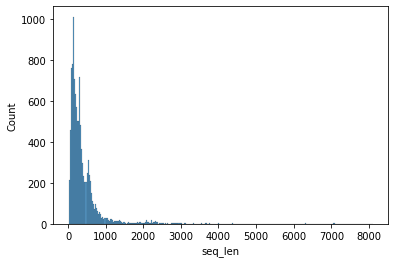

      start      end  count  percentage
0     11.00   685.75  10022   89.251046
1    685.75  1360.50    815    7.257993
2   1360.50  2035.25    148    1.318016
3   2035.25  2710.00    148    1.318016
4   2710.00  3384.75     49    0.436370
5   3384.75  4059.50     21    0.187016
6   4059.50  4734.25      7    0.062339
7   4734.25  5409.00      1    0.008906
8   5409.00  6083.75      1    0.008906
9   6083.75  6758.50      6    0.053433
10  6758.50  7433.25      9    0.080150
11  7433.25  8108.00      2    0.017811


In [8]:
filtered_df.shape
print_seq_len_histogram(filtered_df, 12)

In [38]:
output_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv_lt_1_gte_0.05_prcnt_prevalence.csv")
# filtered_df.to_csv(output_file_path)

In [11]:
np.percentile(filtered_df["seq_len"].values, [90, 95, 99])

array([ 716.  , 1068.8 , 2451.96])

In [12]:
seq_len_filtered_df = filtered_df[filtered_df["seq_len"] <= 2452]
seq_len_filtered_df.shape

(11116, 12)

In [13]:
column_stats(seq_len_filtered_df, "virus_host_name")

Number of unique values = 143
                  virus_host_name  virus_host_name_count  virus_host_name_percent
0                 Cyprinus carpio                    410                 3.688377
1              Petroica australis                    408                 3.670385
2                     Felis catus                    297                 2.671824
3               Gopherus morafkai                    292                 2.626844
4               Peromyscus boylii                    282                 2.536884
5            Marmota flaviventris                    271                 2.437927
6                      Bos taurus                    256                 2.302987
7                Eptesicus fuscus                    254                 2.284995
8                  Macaca mulatta                    232                 2.087082
9              Loxodonta africana                    213                 1.916157
10            Mastomys natalensis                    207            

,virus_host_name,virus_host_name_count,virus_host_name_percent
0,Cyprinus carpio,410,3.688377
1,Petroica australis,408,3.670385
2,Felis catus,297,2.671824
3,Gopherus morafkai,292,2.626844
4,Peromyscus boylii,282,2.536884
5,Marmota flaviventris,271,2.437927
6,Bos taurus,256,2.302987
7,Eptesicus fuscus,254,2.284995
8,Macaca mulatta,232,2.087082
9,Loxodonta africana,213,1.916157


In [14]:
output_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv_lt_1_gte_0.05_prcnt_prevalence_seq_len_in_99prcntile.csv")
#seq_len_filtered_df.to_csv(output_file_path, index=False)

#### Non Immunodeficiency Virus, hosts with >= 0.05% prevalence in the dataset

In [25]:
filtered_df = filter_with_threshold_percentage(non_idv_df, "virus_host_name", 0.05, n=47792)

Size of df = (47792, 11)
n= 47792
Number of unique values = 1304
                                        virus_host_name  virus_host_name_count  virus_host_name_percent
0                                          Homo sapiens                  28782                60.223468
1                                            Sus scrofa                   1286                 2.690827
2                             Hydrochoerus hydrochaeris                    627                 1.311935
3                                    Marmota himalayana                    539                 1.127804
4                                         Gallus gallus                    484                 1.012722
5                                       Cyprinus carpio                    411                 0.859977
6                                    Petroica australis                    408                 0.853699
7                                           Felis catus                    298                 0.623535

In [26]:
column_stats(filtered_df, "virus_host_name")

Number of unique values = 148
                  virus_host_name  virus_host_name_count  virus_host_name_percent
0                    Homo sapiens                  28782                67.017487
1                      Sus scrofa                   1286                 2.994388
2       Hydrochoerus hydrochaeris                    627                 1.459939
3              Marmota himalayana                    539                 1.255035
4                   Gallus gallus                    484                 1.126970
5                 Cyprinus carpio                    411                 0.956994
6              Petroica australis                    408                 0.950008
7                     Felis catus                    298                 0.693879
8               Gopherus morafkai                    292                 0.679908
9               Peromyscus boylii                    282                 0.656623
10           Marmota flaviventris                    271            

,virus_host_name,virus_host_name_count,virus_host_name_percent
0,Homo sapiens,28782,67.017487
1,Sus scrofa,1286,2.994388
2,Hydrochoerus hydrochaeris,627,1.459939
3,Marmota himalayana,539,1.255035
4,Gallus gallus,484,1.126970
5,Cyprinus carpio,411,0.956994
6,Petroica australis,408,0.950008
7,Felis catus,298,0.693879
8,Gopherus morafkai,292,0.679908
9,Peromyscus boylii,282,0.656623


In [27]:
output_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv_gte_0.05_prcnt_prevalence.csv")
filtered_df.to_csv(output_file_path, index=False)

In [28]:
filtered_df.shape

(42947, 11)

**Back to number of host classes**

In [89]:
# 0.7% cutoff
filtered_df = filter_with_threshold_percentage(non_idv_df, "virus_host_name", 0.7)

Size of df = (47792, 11)
Number of unique values = 1304
                                        virus_host_name  virus_host_name_count  virus_host_name_percent
0                                          Homo sapiens                  28782                60.223468
1                                            Sus scrofa                   1286                 2.690827
2                             Hydrochoerus hydrochaeris                    627                 1.311935
3                                    Marmota himalayana                    539                 1.127804
4                                         Gallus gallus                    484                 1.012722
5                                       Cyprinus carpio                    411                 0.859977
6                                    Petroica australis                    408                 0.853699
7                                           Felis catus                    298                 0.623535
8       

In [90]:
output_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv_t0.007_c7.csv")
filtered_df.to_csv(output_file_path, index=False)

In [91]:
# 0.5% cutoff
filtered_df = filter_with_threshold_percentage(non_idv_df, "virus_host_name", 0.5)

Size of df = (47792, 11)
Number of unique values = 1304
                                        virus_host_name  virus_host_name_count  virus_host_name_percent
0                                          Homo sapiens                  28782                60.223468
1                                            Sus scrofa                   1286                 2.690827
2                             Hydrochoerus hydrochaeris                    627                 1.311935
3                                    Marmota himalayana                    539                 1.127804
4                                         Gallus gallus                    484                 1.012722
5                                       Cyprinus carpio                    411                 0.859977
6                                    Petroica australis                    408                 0.853699
7                                           Felis catus                    298                 0.623535
8       

In [92]:
output_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv_t0.005_c13.csv")
filtered_df.to_csv(output_file_path, index=False)

## Immunodeficiency Virus

In [16]:
idv_df = df[df["virus_name"].isin(idv_names)]
idv_df.shape

(220068, 11)

In [15]:
output_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_idv.csv")
# idv_df.to_csv(output_file_path, index=False)
idv_df = pd.read_csv(output_file_path)